<h1><center>Projet Apprentissage en Grande Dimension</center></h1>

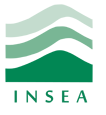



<center><strong>Projet Realisé par : </strong><br /> - <b>Ajarrya</b> Amine <br /> 
<hr>
<center><strong>Encadré par : </strong><br /> - <b>Mr. MOUSANNIF</b> Ahmed</center>

<h1> Chargement des biliothéques necessaires </h1>

In [1]:
import numpy as np 
import pandas as pd #pour traitement des données
import seaborn as sb #pour les visualisations
import matplotlib.pyplot as plt #pour les visualisations
import warnings
warnings.filterwarnings(action="ignore")

#to encode categorical features
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split #To split the data into training set and test set
#to perform feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#import diffirent classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.cross_decomposition import PLSRegression
import xgboost as xgb

from sklearn.model_selection import cross_val_score #for cross validation
from sklearn import metrics

#import differnet metrics to evaluate models
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
%matplotlib inline

***Import data and read data***

In [2]:
#read balanced and umbalanced datasets
imbalanced_data=pd.read_csv('new_Base_CDM.csv',delimiter=';') 
balanced_data=pd.read_csv('new_Base_CDM_balanced_V2.csv',delimiter=';')

In [3]:
#display unbalanced dataset
imbalanced_data.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,Display,cor_sales_in_vol,cor_sales_in_val,turnover,value,ENSEIGNE,VenteConv,Feature
1,No_Displ,11,35.21,19622,8,MONOPRIX,88,No_Feat
2,No_Displ,3,13.32,19622,12,MONOPRIX,36,No_Feat
3,No_Displ,6,8.1,19622,5,MONOPRIX,30,No_Feat
4,No_Displ,13,19.35,19622,8,MONOPRIX,104,No_Feat


In [4]:
#display balanced dataset
balanced_data.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,Display,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
1,No_Displ,2,20.2,47400,36,CORA,72,No_Feat
2,No_Displ,2,11.9,62000,24,LECLERC,48,No_Feat
3,No_Displ,8,29.52,60661,60,AUCHAN,480,No_Feat
4,No_Displ,2,16.2,59677,19,CARREFOUR,38,No_Feat


In [5]:
#get informations about imbalanced data
imbalanced_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200738 entries, 0 to 200737
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Y       200738 non-null  object
 1   X1      200738 non-null  object
 2   X2      200738 non-null  object
 3   X3      200738 non-null  object
 4   X4      200738 non-null  object
 5   X5      200738 non-null  object
 6   X6      200738 non-null  object
 7   X7      200738 non-null  object
dtypes: object(8)
memory usage: 12.3+ MB


In [6]:
#get informations about balanced data
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25783 entries, 0 to 25782
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Y       25783 non-null  object
 1   X1      25783 non-null  object
 2   X2      25783 non-null  object
 3   X3      25783 non-null  object
 4   X4      25783 non-null  object
 5   X5      25783 non-null  object
 6   X6      25783 non-null  object
 7   X7      25783 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


In [7]:
#types of features
imbalanced_data.dtypes

Y     object
X1    object
X2    object
X3    object
X4    object
X5    object
X6    object
X7    object
dtype: object

In [8]:
#drop the first row that contain features name
imb_data=imbalanced_data.drop(0).reset_index(drop=True)
bal_data=balanced_data.drop(0).reset_index(drop=True)

In [9]:
imb_data.head()


,Y,X1,X2,X3,X4,X5,X6,X7
0,No_Displ,11,35.21,19622,8,MONOPRIX,88,No_Feat
1,No_Displ,3,13.32,19622,12,MONOPRIX,36,No_Feat
2,No_Displ,6,8.1,19622,5,MONOPRIX,30,No_Feat
3,No_Displ,13,19.35,19622,8,MONOPRIX,104,No_Feat
4,No_Displ,13,90.09,19622,28,MONOPRIX,364,Feat


In [10]:
bal_data.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,No_Displ,2,20.2,47400,36,CORA,72,No_Feat
1,No_Displ,2,11.9,62000,24,LECLERC,48,No_Feat
2,No_Displ,8,29.52,60661,60,AUCHAN,480,No_Feat
3,No_Displ,2,16.2,59677,19,CARREFOUR,38,No_Feat
4,No_Displ,5,62.1,142602,50,CORA,250,No_Feat


In [11]:
# Variables type Casting 
#transform different continous variables to float
imb_data['X1']=imb_data['X1'].astype(float)
imb_data['X2']=imb_data['X2'].astype(float)
imb_data['X3']=imb_data['X3'].astype(float)
imb_data['X4']=imb_data['X4'].astype(float)
imb_data['X6']=imb_data['X6'].astype(float)


bal_data['X1']=bal_data['X1'].astype(float)
bal_data['X2']=bal_data['X2'].astype(float)
bal_data['X3']=bal_data['X3'].astype(float)
bal_data['X4']=bal_data['X4'].astype(float)
bal_data['X6']=bal_data['X6'].astype(float)

In [12]:
#check features type
imb_data.dtypes

Y      object
X1    float64
X2    float64
X3    float64
X4    float64
X5     object
X6    float64
X7     object
dtype: object

In [13]:
imb_data.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,No_Displ,11.0,35.21,19622.0,8.0,MONOPRIX,88.0,No_Feat
1,No_Displ,3.0,13.32,19622.0,12.0,MONOPRIX,36.0,No_Feat
2,No_Displ,6.0,8.10,19622.0,5.0,MONOPRIX,30.0,No_Feat
3,No_Displ,13.0,19.35,19622.0,8.0,MONOPRIX,104.0,No_Feat
4,No_Displ,13.0,90.09,19622.0,28.0,MONOPRIX,364.0,Feat


In [14]:
#count the number of dispaly and no_dipplay  for umbalanced data
imb_data["Y"].value_counts()

No_Displ    187955
Displ        12782
Name: Y, dtype: int64

In [15]:
#count the number of dispaly and no_dipplay  for balanced data
bal_data["Y"].value_counts()

No_Displ    13000
Displ       12782
Name: Y, dtype: int64

In [16]:
#name of  shops 
bal_data["X5"].value_counts()

CARREFOUR           4629
LECLERC             4257
CASINO              3370
AUCHAN              3003
INTERMARCHE         2701
CORA                1883
CARREFOUR MARKET    1500
SUPER U             1265
SIMPLY MARKET        913
GEANT                761
MONOPRIX             732
MATCH                241
MARCHE U             153
PRISUNIC              99
HYPER U               71
ECOMARCHE             69
OTHERS                60
FRANPRIX              48
SHOPI                 27
Name: X5, dtype: int64

In [17]:
#numbre of samples in each shop
imb_data["X5"].value_counts()

CARREFOUR           35956
LECLERC             34768
AUCHAN              25678
INTERMARCHE         20593
CASINO              18907
CORA                16062
CARREFOUR MARKET    12327
SUPER U             11073
SIMPLY MARKET        8858
MONOPRIX             5175
GEANT                4273
MATCH                2322
MARCHE U             1259
PRISUNIC              712
OTHERS                627
HYPER U               612
FRANPRIX              555
SHOPI                 496
ECOMARCHE             484
Name: X5, dtype: int64

In [18]:
#count the number of feat and no_feat in the unbalanced data
bal_data["X7"].value_counts()

No_Feat    19495
Feat        6287
Name: X7, dtype: int64

In [19]:
#count the number of feat and no_feat in the balanced data
imb_data["X7"].value_counts()

No_Feat    189061
Feat        11676
Name: X7, dtype: int64

## Exploratory Data Analysis ##

### Univariate Analysis ###

In [20]:
#view some basic statistical details about  umbalanced data
imb_data.describe()

,X1,X2,X3,X4,X6
count,200737.000000,200737.000000,200737.000000,200737.000000,200737.000000
mean,6.326886,52.024741,65348.859647,32.754241,227.862773
std,18.264038,166.254333,57249.908990,16.034234,828.147639
min,0.060000,0.200000,1693.000000,1.000000,1.000000
25%,1.000000,10.540000,20115.000000,25.000000,40.000000
50%,3.000000,21.450000,51500.000000,30.000000,80.000000
75%,6.000000,45.140000,91146.000000,40.000000,189.000000
max,1475.000000,13589.220000,284844.000000,200.000000,48816.000000


In [21]:
#view some basic statistical details about  balanced data
bal_data.describe()

,X1,X2,X3,X4,X6
count,25782.000000,25782.000000,25782.000000,25782.000000,25782.000000
mean,13.767151,130.888312,64641.184431,37.646614,587.855260
std,38.203406,372.649805,54924.645702,23.498949,1821.338396
min,1.000000,1.110000,1693.000000,1.000000,1.000000
25%,2.000000,13.360000,21394.000000,25.000000,50.000000
50%,4.000000,31.050000,51522.000000,32.000000,120.000000
75%,11.000000,87.450000,91000.000000,40.000000,380.000000
max,1475.000000,13589.220000,284844.000000,198.000000,48816.000000


***data visualization***

<AxesSubplot:xlabel='Y', ylabel='count'>

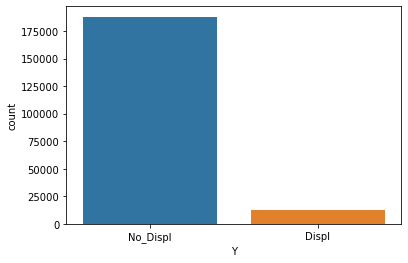

In [22]:
#Display vs No_Dispaly in the umbalanced data
sb.countplot(x="Y", data=imb_data)

<AxesSubplot:xlabel='Y', ylabel='count'>

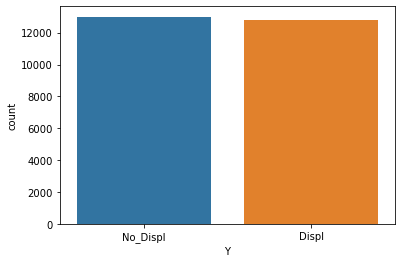

In [23]:
#Display vs No_Dispaly in the balanced data
sb.countplot(x="Y", data=bal_data)

<AxesSubplot:xlabel='Y', ylabel='X3'>

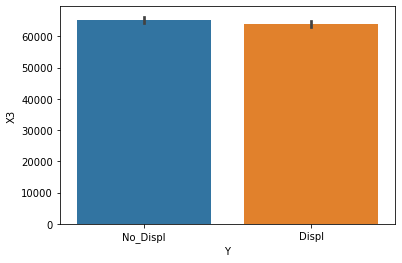

In [24]:
#Dispaly vs turnover in the balanced dataset
sb.barplot(x="Y",y="X3",data=bal_data)

<AxesSubplot:xlabel='Y', ylabel='X3'>

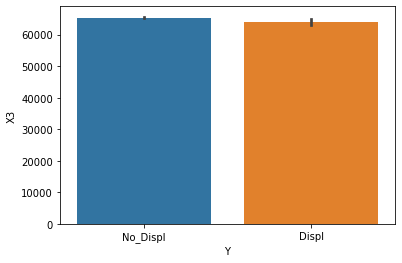

In [25]:
#Dispaly vs turnover in the umbalanced dataset
sb.barplot(x="Y",y="X3",data=imb_data)

Text(0.5, 1.0, 'Imbalanced Data')

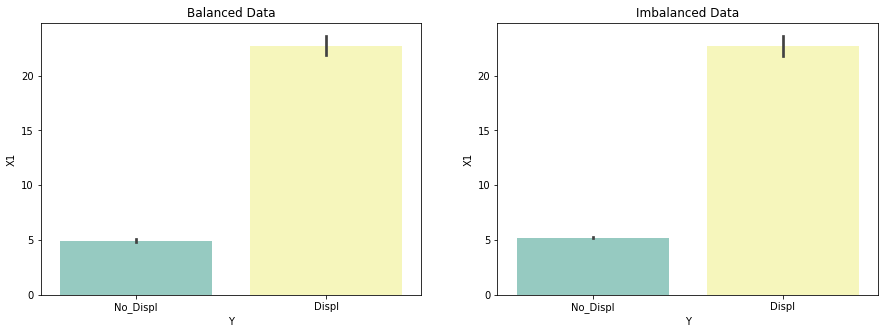

In [26]:
#Display vs sales in volume

fig, axes = plt.subplots(1, 2,figsize=(15, 5))
sb.barplot(ax=axes[0],x="Y",y="X1",data=bal_data,palette="Set3")
axes[0].set_title('Balanced Data')
sb.barplot(ax=axes[1],x="Y",y="X1",data=imb_data,palette="Set3")
axes[1].set_title('Imbalanced Data')


<AxesSubplot:xlabel='Y', ylabel='X2'>

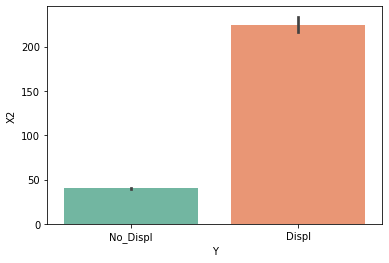

In [27]:

sb.barplot(x="Y",y="X2",data=imb_data,palette="Set2")

le retail display augmente le nombre de ventes.

<AxesSubplot:xlabel='Y', ylabel='X3'>

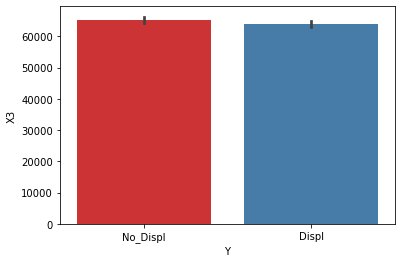

In [28]:
sb.barplot(x="Y",y="X3",data=bal_data,palette="Set1")

<AxesSubplot:xlabel='X5', ylabel='Count'>

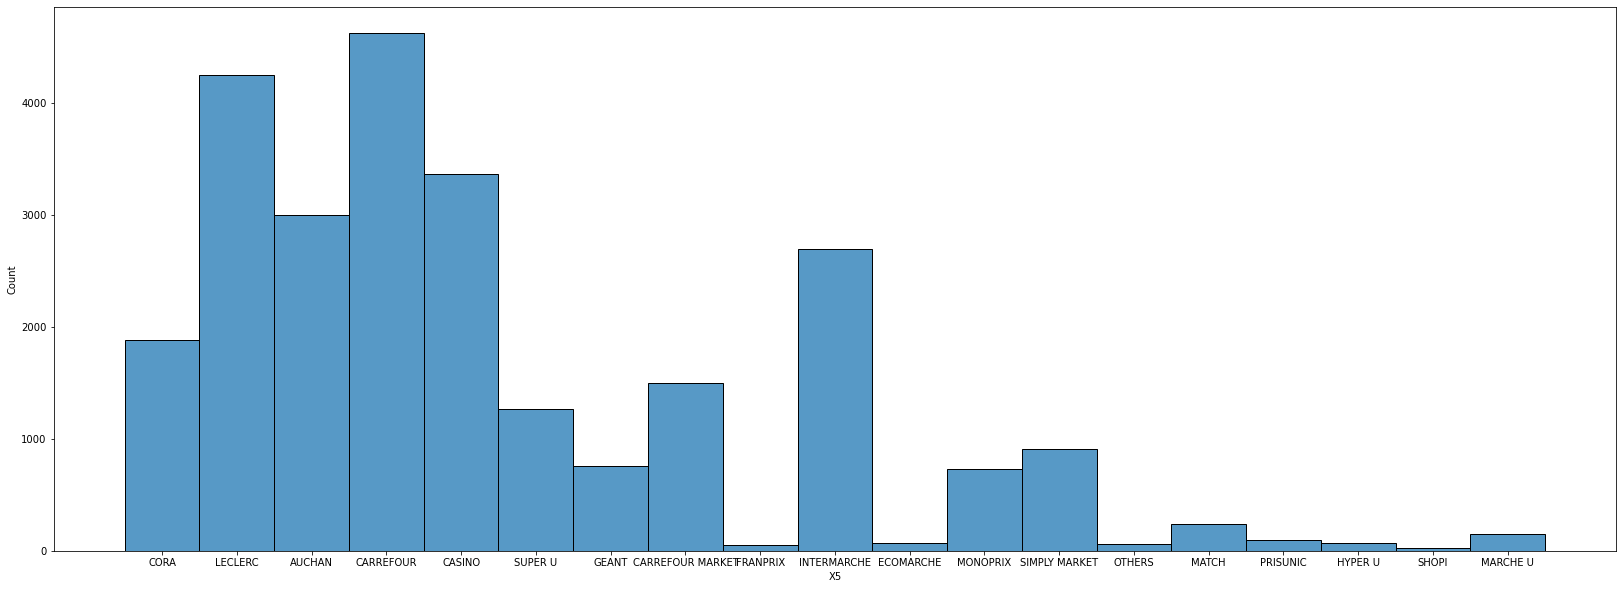

In [29]:

plt.figure(figsize=(28,10))
sb.histplot(data=bal_data, x="X5")

<AxesSubplot:xlabel='X5', ylabel='Count'>

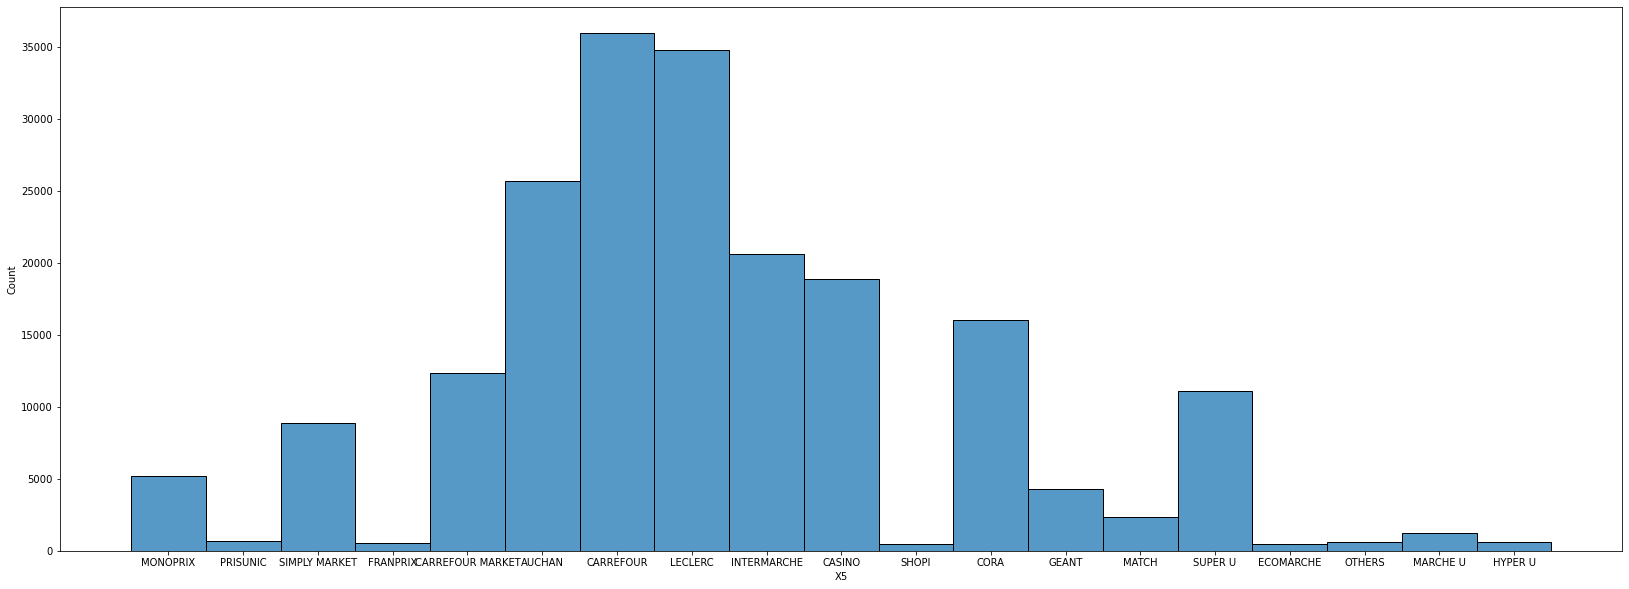

In [30]:
plt.figure(figsize=(28,10))
sb.histplot(data=imb_data, x="X5",palette="ch:.25")

<AxesSubplot:xlabel='X5', ylabel='X1'>

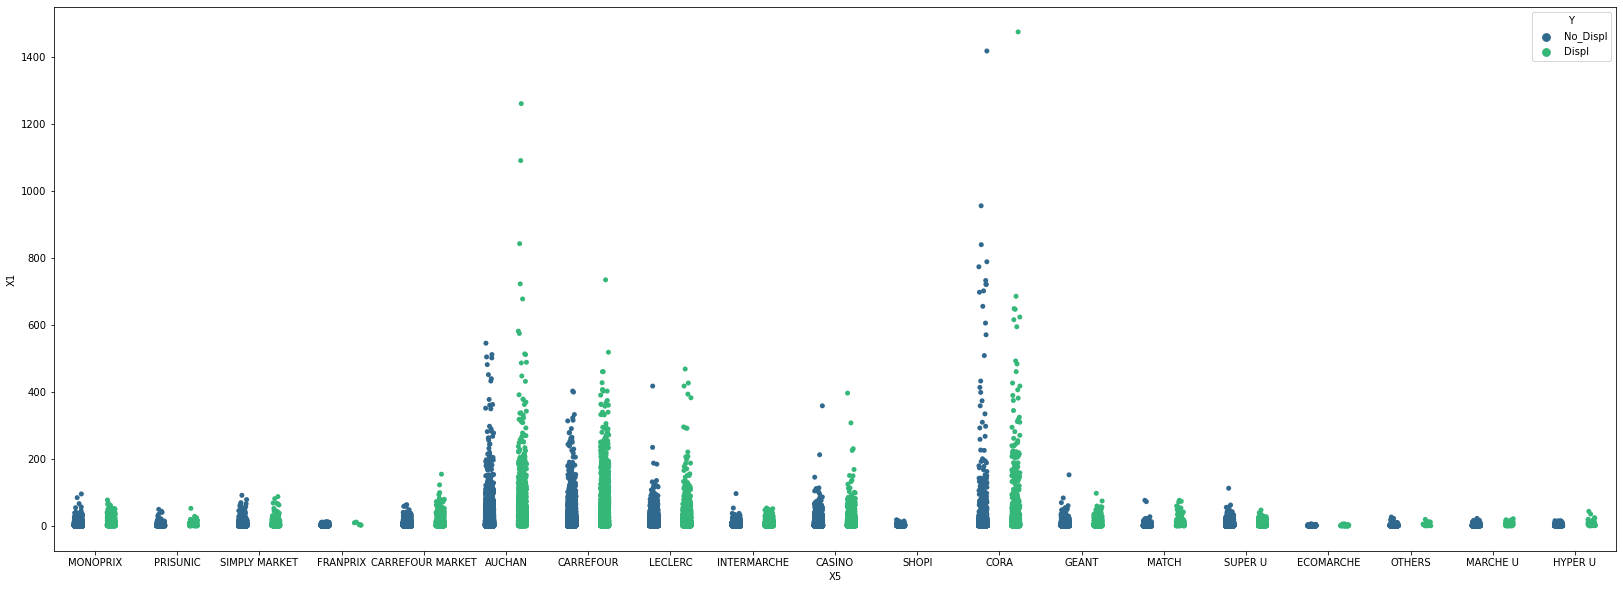

In [31]:
#diplay vs sales for each shop in the umbalanced data
plt.figure(figsize=(28,10))
sb.stripplot(x='X5', y='X1', data=imb_data, jitter=True, hue='Y', dodge=True, palette='viridis')

<AxesSubplot:xlabel='X5', ylabel='X1'>

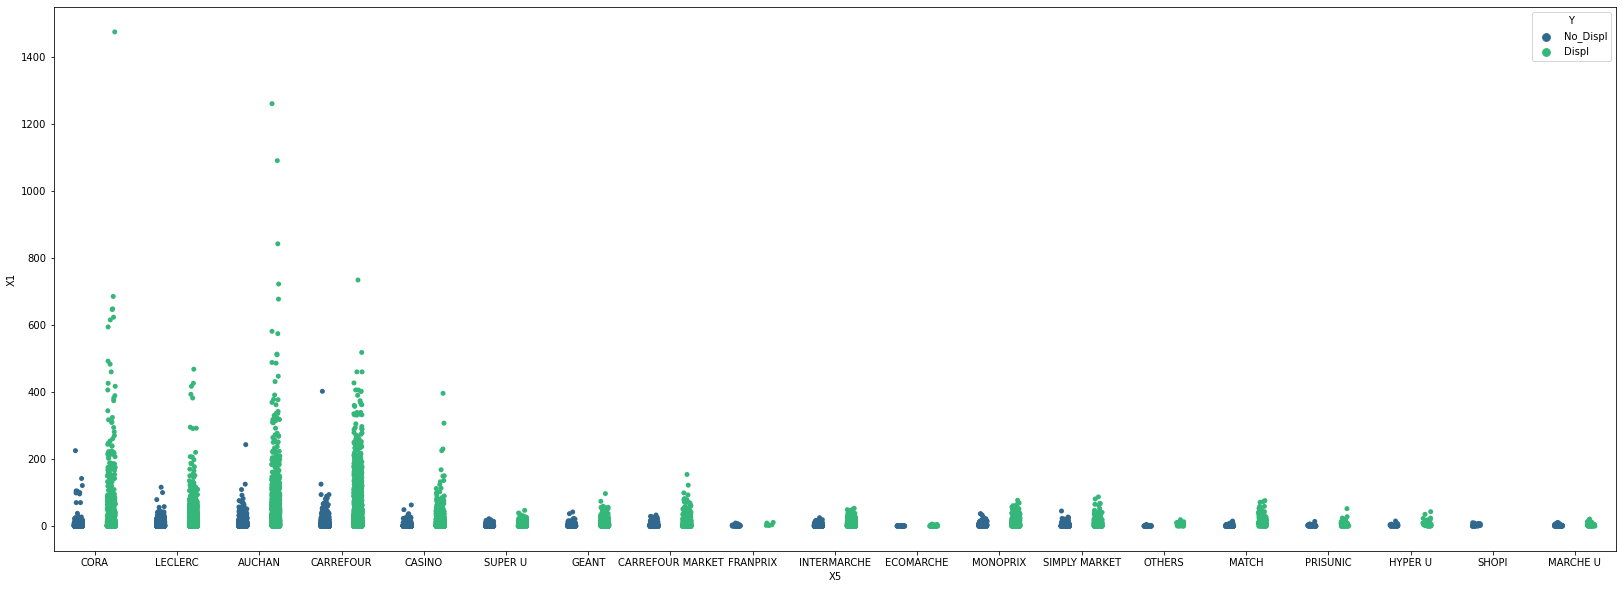

In [32]:
#diplay vs sales for each shop in the balanced data
plt.figure(figsize=(28,10))
sb.stripplot(x='X5', y='X1', data=bal_data, jitter=True, hue='Y', dodge=True, palette='viridis')

les magasins qui utilisent le retail display augmentent leur ventes.

***Categorical Variables Transformation***

In [33]:
#transform Y and X7 to binary variables
#create a dictionary that contains the coding values for X7 and Y
transf_col = {"Y": {"No_Displ": 0, "Displ": 1},
                "X7": {"No_Feat": 0, "Feat":1}
               }
data1 = imb_data.replace(transf_col) #replace categories with those values
data1.head() #view first 5 rows

,Y,X1,X2,X3,X4,X5,X6,X7
0,0,11.0,35.21,19622.0,8.0,MONOPRIX,88.0,0
1,0,3.0,13.32,19622.0,12.0,MONOPRIX,36.0,0
2,0,6.0,8.10,19622.0,5.0,MONOPRIX,30.0,0
3,0,13.0,19.35,19622.0,8.0,MONOPRIX,104.0,0
4,0,13.0,90.09,19622.0,28.0,MONOPRIX,364.0,1


In [34]:
#use one hot encoding for ENSEIGNE feature using get_dummies method
data1 = pd.get_dummies(data1, columns = ['X5'])
data1.head()

,Y,X1,X2,X3,X4,X6,X7,X5_AUCHAN,X5_CARREFOUR,X5_CARREFOUR MARKET,...,X5_INTERMARCHE,X5_LECLERC,X5_MARCHE U,X5_MATCH,X5_MONOPRIX,X5_OTHERS,X5_PRISUNIC,X5_SHOPI,X5_SIMPLY MARKET,X5_SUPER U
0,0,11.0,35.21,19622.0,8.0,88.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,3.0,13.32,19622.0,12.0,36.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,6.0,8.10,19622.0,5.0,30.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,13.0,19.35,19622.0,8.0,104.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,13.0,90.09,19622.0,28.0,364.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
data2 = bal_data.replace(transf_col) #replace categories with those values
data2.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,0,2.0,20.20,47400.0,36.0,CORA,72.0,0
1,0,2.0,11.90,62000.0,24.0,LECLERC,48.0,0
2,0,8.0,29.52,60661.0,60.0,AUCHAN,480.0,0
3,0,2.0,16.20,59677.0,19.0,CARREFOUR,38.0,0
4,0,5.0,62.10,142602.0,50.0,CORA,250.0,0


In [37]:
#use one hot encoding for ENSEIGNE feature
data2 = pd.get_dummies(data2, columns = ['X5'])
data2.head()

,Y,X1,X2,X3,X4,X6,X7,X5_AUCHAN,X5_CARREFOUR,X5_CARREFOUR MARKET,...,X5_INTERMARCHE,X5_LECLERC,X5_MARCHE U,X5_MATCH,X5_MONOPRIX,X5_OTHERS,X5_PRISUNIC,X5_SHOPI,X5_SIMPLY MARKET,X5_SUPER U
0,0,2.0,20.20,47400.0,36.0,72.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2.0,11.90,62000.0,24.0,48.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,8.0,29.52,60661.0,60.0,480.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2.0,16.20,59677.0,19.0,38.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,5.0,62.10,142602.0,50.0,250.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***Correlation Matrix***


In [38]:
#create Correlation matrix 
corr_matrix=data1.corr()
corr_matrix["Y"].sort_values(ascending=False) #get the correlation of target variable with other variables and sort the results

Y                      1.000000
X7                     0.450526
X2                     0.271153
X6                     0.248863
X1                     0.234218
X4                     0.169297
X5_CASINO              0.072299
X5_GEANT               0.029671
X5_MONOPRIX            0.008301
X5_ECOMARCHE           0.005899
X5_INTERMARCHE         0.004487
X5_CARREFOUR           0.003963
X5_PRISUNIC            0.002630
X5_HYPER U            -0.001099
X5_CARREFOUR MARKET   -0.004583
X5_OTHERS             -0.005822
X3                    -0.006011
X5_MARCHE U           -0.006762
X5_MATCH              -0.009894
X5_FRANPRIX           -0.011400
X5_SUPER U            -0.012608
X5_SHOPI              -0.012979
X5_LECLERC            -0.015304
X5_CORA               -0.018254
X5_AUCHAN             -0.019672
X5_SIMPLY MARKET      -0.026924
Name: Y, dtype: float64

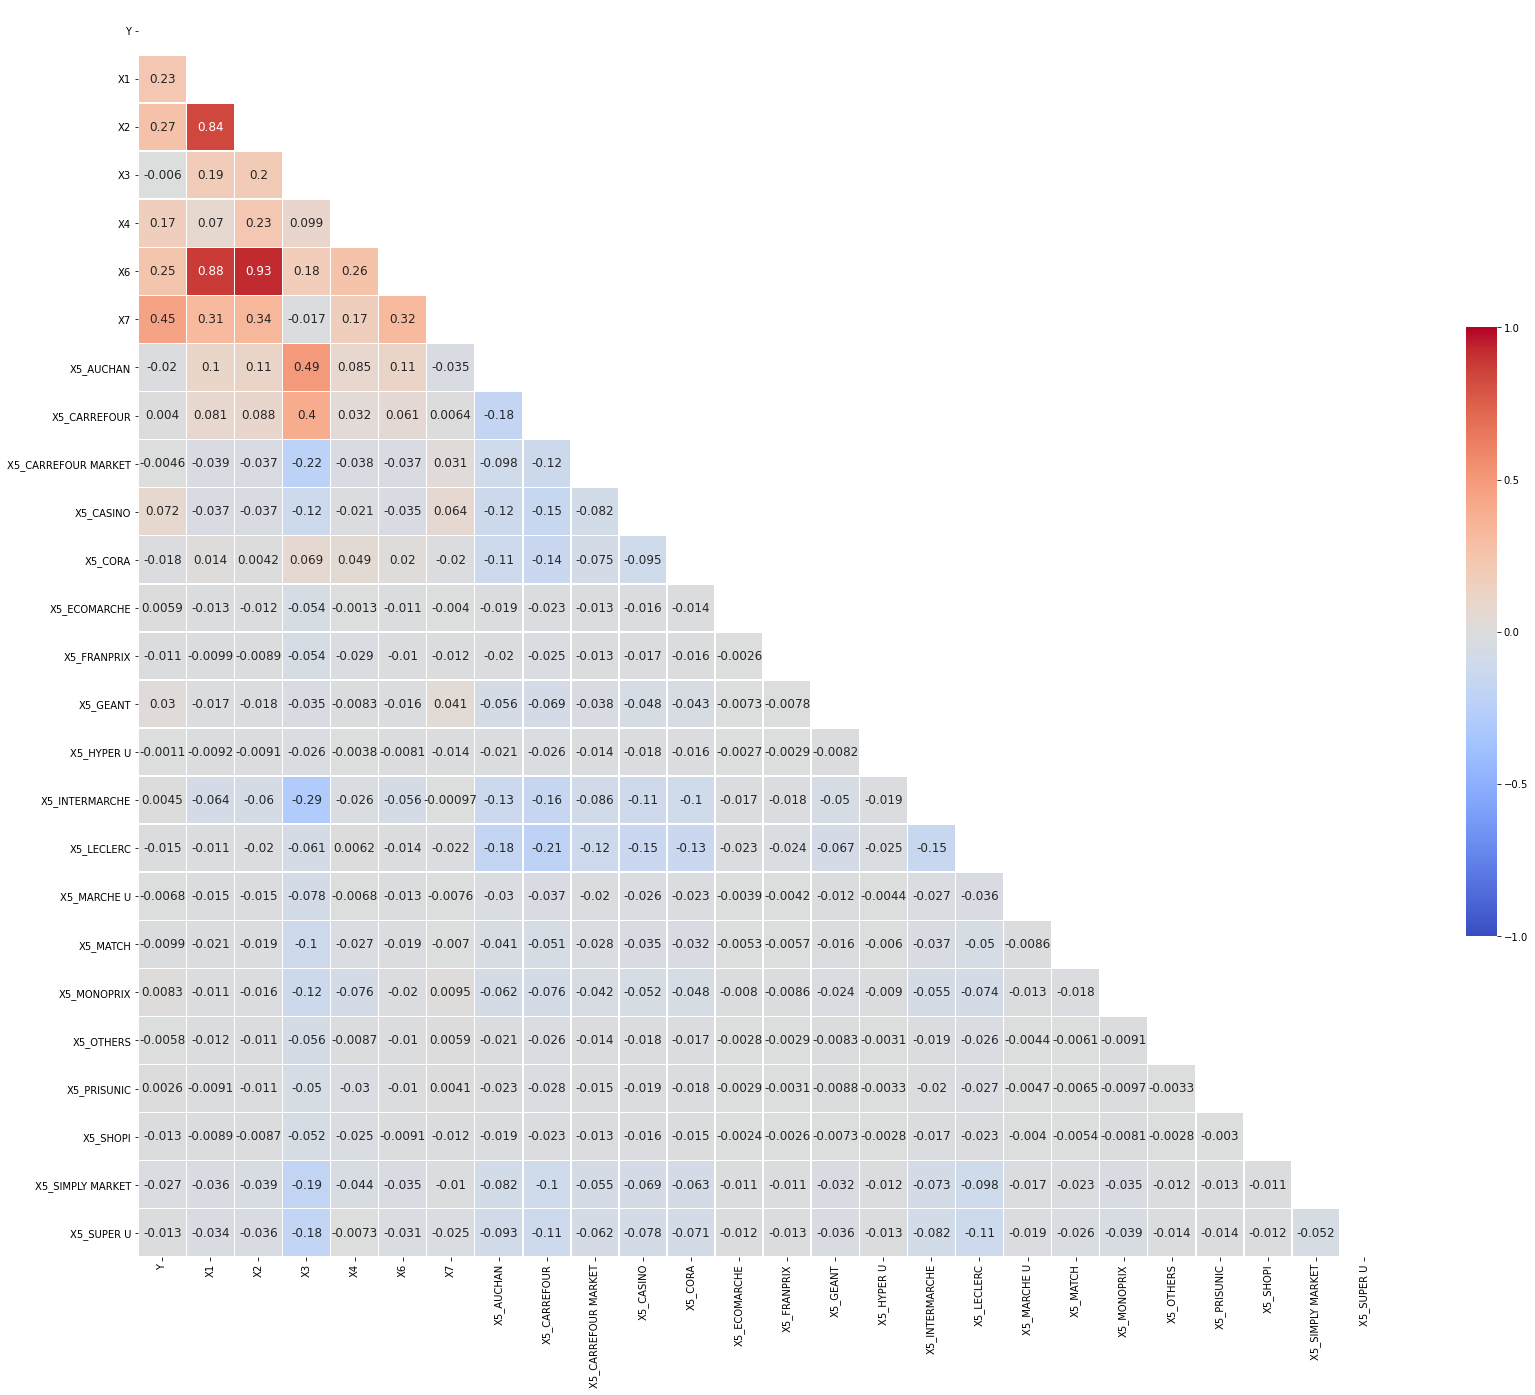

In [39]:
#plot correaltion matrix for imbalancd data
f, ax =plt.subplots(figsize=(28, 28)) 
heatmap = sb.heatmap(corr_matrix,
                      mask = np.triu(corr_matrix), #If passed, data will not be shown in cells where mask is True
                      square = True, #set the Axes aspect to “equal” so each cell will be square-shaped
                      linewidths = .5, #Width of the lines that will divide each cell
                      cmap ='coolwarm', #matplotlib colormap name 
                      cbar_kws = {'shrink': .4,'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, #Values to anchor the colormap
                      vmax = 1,
                      annot = True, #write the correlation value in each cell.
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sb.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [40]:
#Correlation matrix
corr_matrix2=data2.corr()
corr_matrix2["Y"].sort_values(ascending=False)

Y                      1.000000
X7                     0.504959
X2                     0.250140
X6                     0.234277
X4                     0.232803
X1                     0.232654
X5_CASINO              0.130776
X5_GEANT               0.047998
X5_ECOMARCHE           0.016204
X5_MONOPRIX            0.014524
X5_CARREFOUR           0.013961
X5_INTERMARCHE         0.009859
X5_PRISUNIC            0.004915
X5_HYPER U             0.001185
X5_CARREFOUR MARKET   -0.004195
X5_OTHERS             -0.009251
X3                    -0.011046
X5_MATCH              -0.018929
X5_MARCHE U           -0.022072
X5_SUPER U            -0.022681
X5_FRANPRIX           -0.032027
X5_SHOPI              -0.032105
X5_LECLERC            -0.037714
X5_AUCHAN             -0.042514
X5_CORA               -0.045777
X5_SIMPLY MARKET      -0.067007
Name: Y, dtype: float64

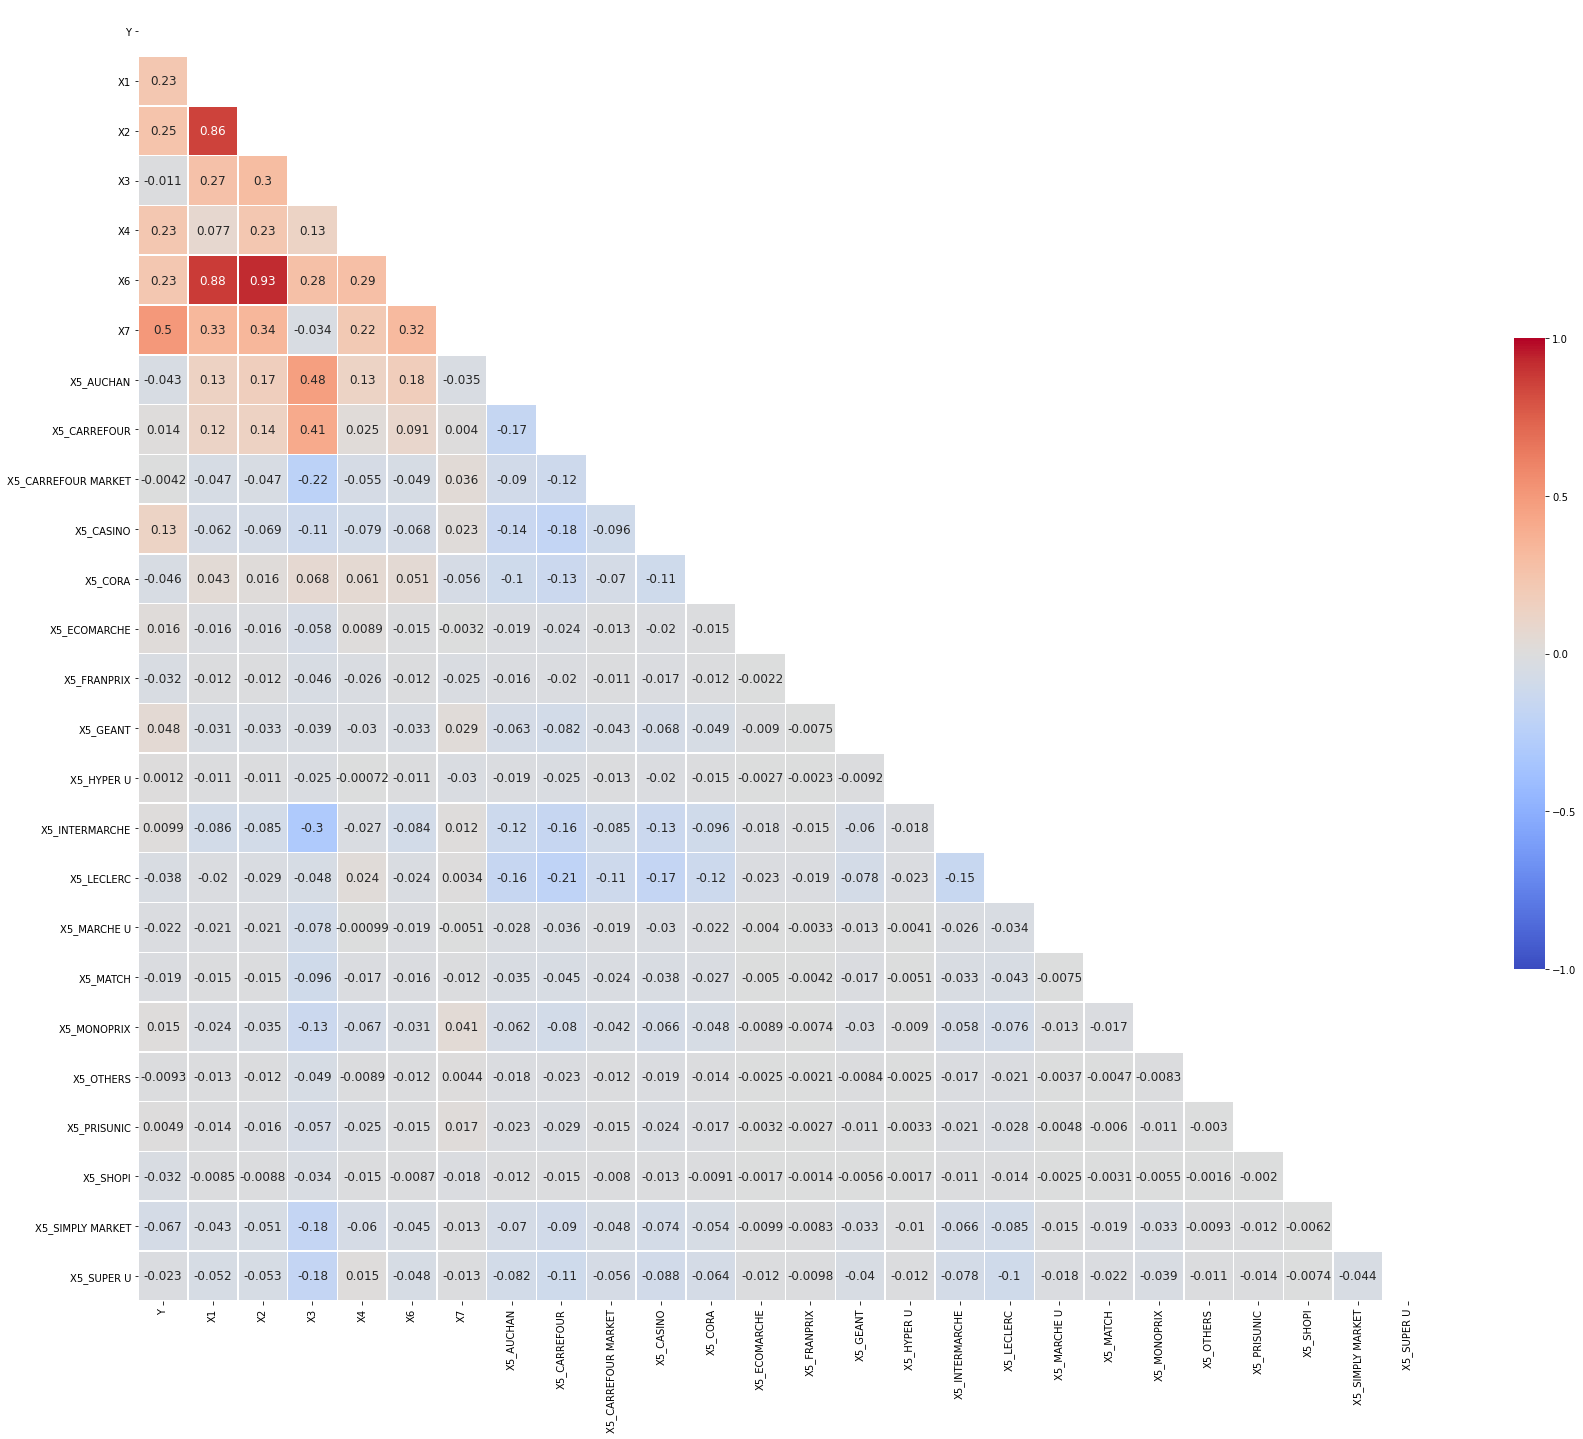

In [41]:
#plot correaltion matrix for balancd data
f, ax =plt.subplots(figsize=(29, 29))
heatmap = sb.heatmap(corr_matrix2, 
                      mask = np.triu(corr_matrix2), #If passed, data will not be shown in cells where mask is True
                      square = True, #set the Axes aspect to “equal” so each cell will be square-shaped
                      linewidths = .5,  #Width of the lines that will divide each cell
                      cmap ='coolwarm',  #matplotlib colormap name
                      cbar_kws = {'shrink': .4,'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,#Values to anchor the colormap 
                      vmax = 1,
                      annot = True, #write the correlation value in each cell.
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix2.columns, rotation = 0)
ax.set_xticklabels(corr_matrix2.columns)

sb.set_style({'xtick.bottom': True}, {'ytick.left': True})

From the correlation matrix, we can see that variables X1, X2, X6 seem to be highly correlated . The target variable Display  is correlated to the variable Feature(0.5). 



# Train different ML models #

###  Balanced Data set

*split the data into training and test set*

In [42]:
y=data2['Y'] #extract label
X=data2[list(data2.columns)[1:]] #extract features
# using 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42) 

In [43]:
#the size of each set
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

20625
5157
20625
5157


**Features selection**

In [44]:
bestfeatures = SelectKBest(score_func=chi2, k=7) #feature selection estimator using Chi2 test
fit = bestfeatures.fit(X,y) #fit the estimator
dfscores = pd.DataFrame(fit.scores_) #convert the result to a data frame
dfcolumns = pd.DataFrame(X.columns) #set the dataframe column's as x columns name 
#concat two dataframes for visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
featureScores.sort_values(by = ["Score"]) #sort the scores

,Specs,Score
14,X5_HYPER U,3.607430e-02
8,X5_CARREFOUR MARKET,4.273219e-01
21,X5_PRISUNIC,6.204491e-01
20,X5_OTHERS,2.201515e+00
15,X5_INTERMARCHE,2.243332e+00
7,X5_CARREFOUR,4.122743e+00
19,X5_MONOPRIX,5.283883e+00
11,X5_ECOMARCHE,6.751852e+00
18,X5_MATCH,9.151900e+00
17,X5_MARCHE U,1.248613e+01


## Logistic Regression ##

In [45]:
#loitic regression model
lg_clf=LogisticRegression() #create model with default hyperparametres
lg_clf.fit(X_train,y_train) #train the model on the train set

LogisticRegression()

In [46]:
#function that compute accuracy, recall, precision and F1_score
def evaluate_model(model,X_test,y_test): # take as argument: the model and the test set
    preds = model.predict(X_test) #calculate prediction for the test set
    print("Accuracy =", accuracy_score(y_test, preds)) #calculate the  accuracy
    print("Recall =", recall_score(y_test, preds)) #calculate the recall
    print("Precision=",precision_score(y_test, preds)) #calculate the precision
    print("f1_score=", f1_score(y_test,preds )) #calculate f1_score

In [47]:
#evaluate logistic regression on the test set
print('évaluation de la régression logistique:')
evaluate_model(lg_clf,X_test,y_test)


évaluation de la régression logistique:
Accuracy = 0.6525111498933488
Recall = 0.6644135188866799
Precision= 0.6380297823596792
f1_score= 0.6509544215037008


In [48]:
#function that plot the receiver operating characteristic  and area under the curve
def plot_roc(model,X_test,y_test): # take as argument: the model and the test set
    preds = model.predict(X_test) #calculate prediction for the test set
    #get the false positive, true positive rate and the treshold to use in the classification
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, preds) 
    
    roc_auc = auc(false_positive_rate, true_positive_rate) #area under the curve
    plt.figure(figsize=(8,8))
    #plot the roc curve
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.title('Receiver Operating Characteristic') #set title of the curve
    plt.legend(loc = 'lower right') #set the legend 
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate') 
    plt.xlabel('False Positive Rate')

    

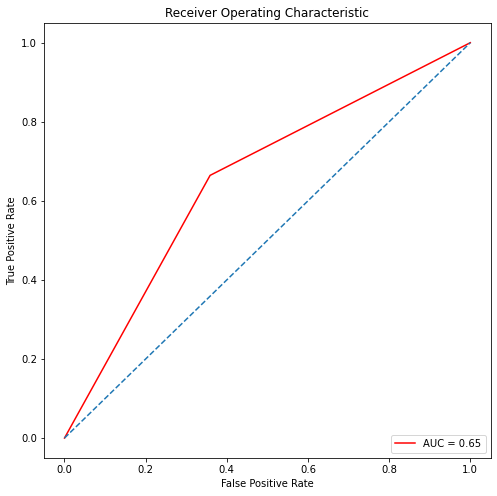

In [49]:
#plot the roc curve for logistic regression
plot_roc(lg_clf,X_test,y_test)

In [50]:
#function that plot confusion matrix of eash model
def confusion_matrix(model,X_test,y_test):
    preds = model.predict(X_test)
    conf_matrix = metrics.confusion_matrix(y_test, preds)
    sb.heatmap(conf_matrix, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    

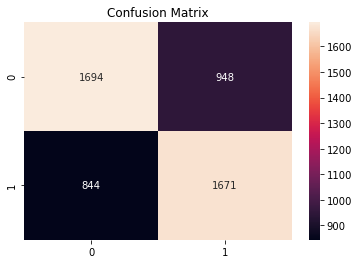

In [51]:
#confusin matrix for logistic regression
confusion_matrix(lg_clf,X_test,y_test)

## Decision Tree Classifier ##

In [52]:
#decsion tree classifier
tree_clf=DecisionTreeClassifier() #build the model with default hyperparamtres
tree_clf.fit(X_train,y_train) #train the model on the training set

DecisionTreeClassifier()

In [53]:
#evaluate the decision tree model
print('évaluation du modèle Arbre de décision:')
evaluate_model(tree_clf,X_test,y_test)

évaluation du modèle Arbre de décision:
Accuracy = 0.8047314330036843
Recall = 0.8286282306163022
Precision= 0.7834586466165413
f1_score= 0.8054106280193237


In [56]:
#simple dicion tree visualisation
new_data=data2[['Y','X1','X3','X7']] #features


In [57]:
new_data=new_data.sample(n=15) #take a sample on which we will train the model

In [58]:
new_data['Y'].value_counts()

0    8
1    7
Name: Y, dtype: int64

In [59]:
x_new=new_data[['X1','X3','X7']]
y_new=new_data['Y']

In [60]:
tree_classifier=DecisionTreeClassifier()
tree_classifier.fit(x_new,y_new)

DecisionTreeClassifier()

In [63]:
list(data2.columns)[1:]

['X1',
 'X2',
 'X3',
 'X4',
 'X6',
 'X7',
 'X5_AUCHAN',
 'X5_CARREFOUR',
 'X5_CARREFOUR MARKET',
 'X5_CASINO',
 'X5_CORA',
 'X5_ECOMARCHE',
 'X5_FRANPRIX',
 'X5_GEANT',
 'X5_HYPER U',
 'X5_INTERMARCHE',
 'X5_LECLERC',
 'X5_MARCHE U',
 'X5_MATCH',
 'X5_MONOPRIX',
 'X5_OTHERS',
 'X5_PRISUNIC',
 'X5_SHOPI',
 'X5_SIMPLY MARKET',
 'X5_SUPER U']

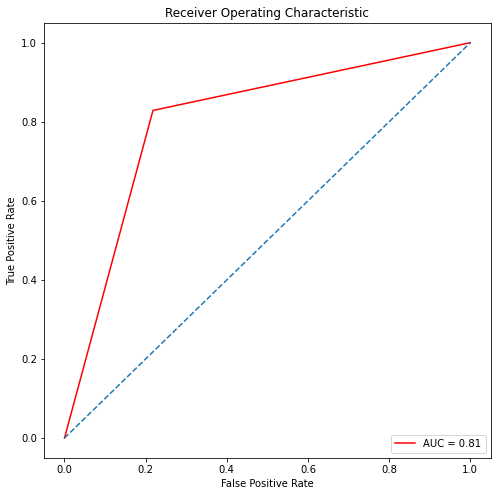

In [66]:
#plot the roc curve for decison tree
plot_roc(tree_clf,X_test,y_test)

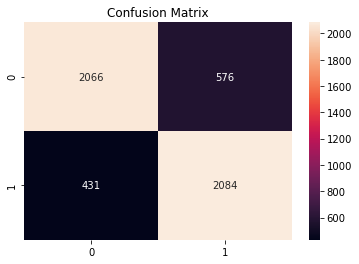

In [67]:
#confusin matrix for dicison tree
confusion_matrix(tree_clf,X_test,y_test)

## Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier() #create random forest model
forest_clf.fit(X_train,y_train) #train the model

RandomForestClassifier()

In [69]:
#evaluate the random forest 
print('évaluation du modèle de forêts aléatoire:')
evaluate_model(forest_clf,X_test,y_test)

évaluation du modèle de forêts aléatoire:
Accuracy = 0.8512701182858251
Recall = 0.8441351888667992
Precision= 0.8498799039231385
f1_score= 0.8469978057051665


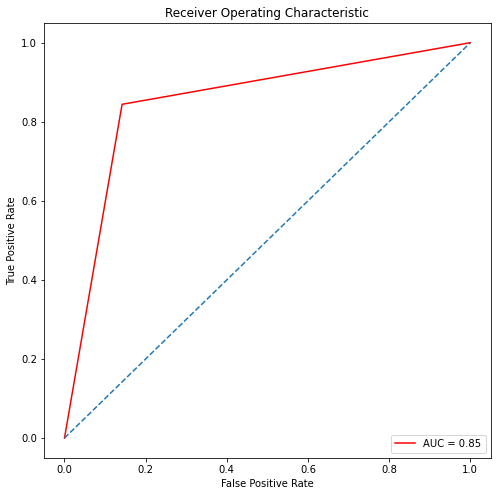

In [70]:
#plot the roc curve for random forest
plot_roc(forest_clf,X_test,y_test)

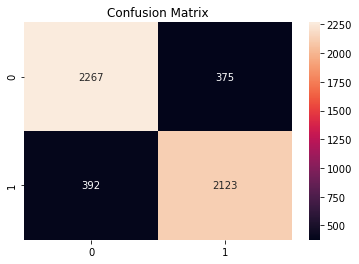

In [71]:
#confusin matrix for random forest
confusion_matrix(forest_clf,X_test,y_test)

## Ada Boost Classifier ##

In [72]:
#adaboost calssifier
ada_boost_clf=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=15)
ada_boost_clf.fit(X_train,y_train) #train adaboost on the train set

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=15)

In [73]:
#evaluate AdaBoost model
evaluate_model(ada_boost_clf,X_test,y_test)

Accuracy = 0.8268373085127012
Recall = 0.8059642147117296
Precision= 0.8334703947368421
f1_score= 0.8194865575096019


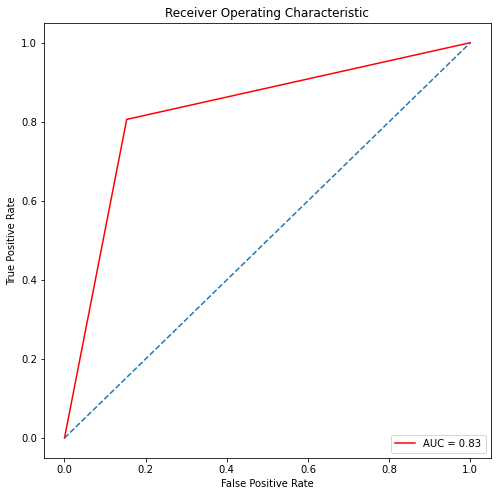

In [74]:
#plot the roc curve for AdaBoost
plot_roc(ada_boost_clf,X_test,y_test)

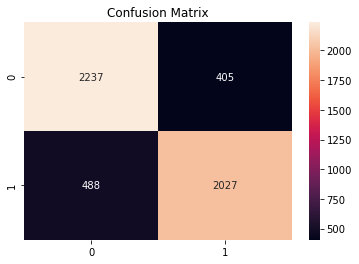

In [75]:
#confusin matrix for adaboost
confusion_matrix(ada_boost_clf,X_test,y_test)

## XgBoost Classifier ##

In [76]:
xgb_cl = xgb.XGBClassifier() #create XgBoost classufier
xgb_cl.fit(X_train, y_train) # train the classifier of the train set

[22:53:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
#evaluate Xgboost model
print('évaluation du XgBoost:')
evaluate_model(xgb_cl,X_test,y_test)

évaluation du XgBoost:
Accuracy = 0.8338181113050223
Recall = 0.7972166998011928
Precision= 0.8524659863945578
f1_score= 0.8239161701253338


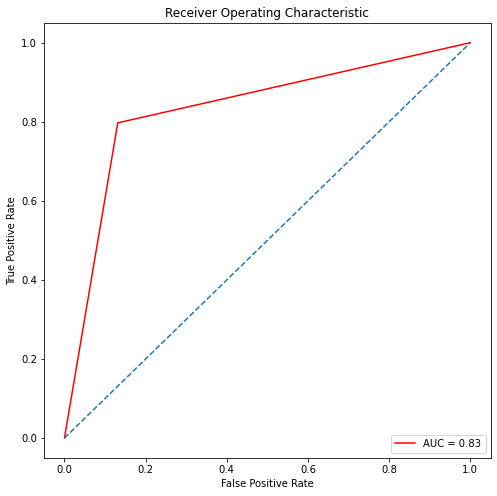

In [78]:
#plot the roc curve for Xgboost
plot_roc(xgb_cl,X_test,y_test)

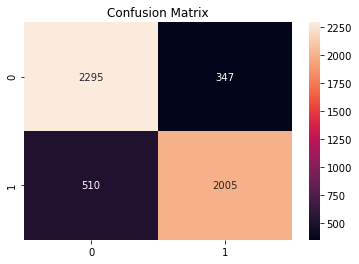

In [79]:
#confusin matrix for Xgboost
confusion_matrix(xgb_cl,X_test,y_test)

## SVM Classifier

In [80]:
svm_clf=SVC(gamma='auto')#create svm classufier
svm_clf.fit(X_train,y_train)# tarin the svm classifier of the train set

SVC(gamma='auto')

In [81]:
#evaluate Xgboost model
print('évaluation du SVM:')
evaluate_model(svm_clf,X_test,y_test)

évaluation du SVM:
Accuracy = 0.6565832848555362
Recall = 0.9165009940357853
Precision= 0.5962234868080704
f1_score= 0.7224572950948127


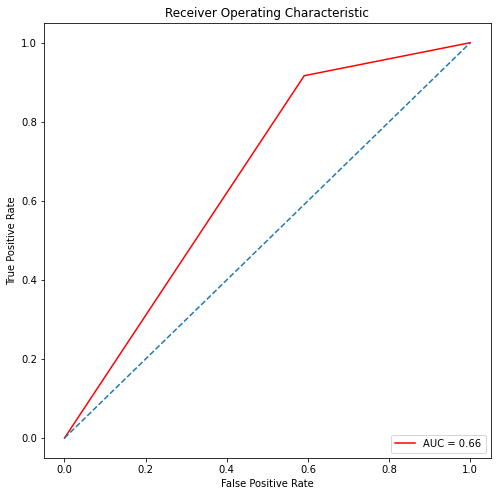

In [82]:
#plot the roc curve for svm
plot_roc(svm_clf,X_test,y_test)

## Model selection and hyperparametr tuning using cross validation

In [83]:
#  function that compares the CV perfromance of different  models 
def cv_comparison(models, X, y, cv):
    # Initiate a DataFrame for the averages 
    cv_accuracies = pd.DataFrame()
    accuracies = []
    racalls = []
    precisions = []
    f1_scores= []
    # Loop through the models and run a CV, then add the average scores to the DataFrame 
    data_dict = {}
    for model in models:
        accuracy =cross_val_score(model, X, y, scoring='accuracy', cv=cv)
        accuracies.append(accuracy)
        accuracy_avg = round(accuracy.mean(), 4)
        
        precision = cross_val_score(model, X, y, scoring='precision', cv=cv)
        precisions.append(precision)
        precision_avg = round(precision.mean(), 4)
        
        recall = cross_val_score(model, X, y, scoring='recall', cv=cv)
        racalls.append(recall)
        recall_avg = round(recall.mean(), 4)
        
        f1_score =cross_val_score(model, X, y, scoring='f1', cv=cv)
        f1_scores.append(f1_score)
        f1_score_avg = round(f1_score.mean(), 4)
        
        data_dict[str(model.__class__).split(".")[-1]] = [accuracy_avg, precision_avg, recall_avg, f1_score_avg]
        
    cv_accuracies = pd.DataFrame(data_dict, index = ['Accuracy', 'Precision', 'Recall','F1_score']) 
    return cv_accuracies

In [84]:
models=[forest_clf, xgb_cl, tree_clf,ada_boost_clf] 

cv_accuracies=cv_comparison(models, X_train, y_train, 5)

[00:03:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:03:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:03:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [85]:
cv_accuracies

,RandomForestClassifier'>,XGBClassifier'>,DecisionTreeClassifier'>,AdaBoostClassifier'>
Accuracy,0.8399,0.8345,0.7941,0.8052
Precision,0.8500,0.8633,0.7837,0.8197
Recall,0.8225,0.7933,0.8082,0.8265
F1_score,0.8353,0.8268,0.7968,0.8073


### Hyperparametrs Tuning for Random Forest




In [86]:
#number of decision tree estimators to use
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# number of features to consider at every split
max_features = ['auto', 'sqrt']
# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 55, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
#whether bootstrap samples are used when building trees or not.
bootstrap=[True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
                'bootstrap':bootstrap }
#random search model
rf_random = RandomizedSearchCV(estimator = forest_clf, param_distributions = random_grid, 
                        n_iter = 20, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

# the best parameters from the random search
rf_random.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'n_estimators': 200,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 55,
 'bootstrap': False}

In [87]:
#create random forest model with the best hyperparamatres
forest_final_model=RandomForestClassifier(n_estimators = 200,
                                 min_samples_split = 5,
                                 max_features = 'auto',
                                 max_depth = 55,
                                 bootstrap = False,
                                 random_state = 42)
forest_final_model.fit(X_train,y_train) #train the final random forest model

RandomForestClassifier(bootstrap=False, max_depth=55, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [88]:
#evaluate the final random forest model
print('évaluation du random forest tuned:')
evaluate_model(forest_final_model,X_test,y_test)

évaluation du random forest tuned:
Accuracy = 0.8518518518518519
Recall = 0.8433399602385686
Precision= 0.8514652749899638
f1_score= 0.847383140231722


### Hyperparameter Tuning for Extreme Gradient Boosting

In [89]:
#number of trees boosted to use
xgb_n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]

#maximum number of levels in tree
xgb_max_depth = [int(x) for x in np.linspace(2, 20, 10)]

#minimum number of instaces needed in each node
xgb_min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]

#tree construction algorithm used in XGBoost
xgb_tree_method = ['auto', 'exact', 'approx', 'hist', 'gpu_hist']

#learning rate
xgb_eta = [x for x in np.linspace(0.1, 0.6, 6)]

#minimum loss reduction required to make further partition
xgb_gamma = [int(x) for x in np.linspace(0, 0.5, 6)]

#create the grid
xgb_grid = {'n_estimators': xgb_n_estimators,
            'max_depth': xgb_max_depth,
            'min_child_weight': xgb_min_child_weight,
            'tree_method': xgb_tree_method,
            'eta': xgb_eta,
            'gamma': xgb_gamma}

In [90]:
# Create the model to be tuned
xgb_classifier = xgb.XGBClassifier()

# Create the random search Random Forest
xgb_random = RandomizedSearchCV(estimator = xgb_classifier, param_distributions = xgb_grid, 
                                n_iter = 25,cv= 5, verbose = 2, 
                                random_state = 42, n_jobs = -1)

# Fit the random search model
xgb_random.fit(X_train, y_train)

# Get the optimal parameters
xgb_random.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[02:00:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'tree_method': 'hist',
 'n_estimators': 1000,
 'min_child_weight': 1,
 'max_depth': 6,
 'gamma': 0,
 'eta': 0.1}

In [91]:
#create Xgboost classifier with the best hyperparamatres
final_xgb_model = xgb.XGBClassifier(tree_method ='hist',
 n_estimators= 1000,
 min_child_weight=1,
 max_depth= 6,
 gamma=0,
 eta= 0.1)
final_xgb_model.fit(X_train,y_train) #train the model


[02:01:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='hist', validate_parameters=1, verbosity=None)

In [92]:
#evaluate the final Xgboost model
print('évaluation du Xgboost tuned:')
evaluate_model(final_xgb_model,X_test,y_test)

évaluation du Xgboost tuned:
Accuracy = 0.8553422532480124
Recall = 0.8473161033797216
Precision= 0.8547934215804252
f1_score= 0.8510383386581468


### Hyperparameter Tuning for AdaBoost 

In [93]:
#number of trees to consider
n_trees = [ 30,50,60]
#learning rate
learning_rate=[ 0.01, 0.1, 1.0]
#define the grid
adaboost_grid = {'n_estimators': n_trees,
            'learning_rate': learning_rate}
from sklearn.model_selection import GridSearchCV
#use grid search to look for the best hyperparametrs
Grid_search=GridSearchCV(ada_boost_clf,adaboost_grid,cv=5)


In [94]:
Grid_search.fit(X_train,y_train) #fir the gridsearch with training data


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                          n_estimators=15),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [30, 50, 60]})

In [95]:
Grid_search.best_params_ #get the best hyperparametrs

{'learning_rate': 0.01, 'n_estimators': 50}

In [100]:
#create final adaboost classifier with the best hyperparamatres
final_adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=50, learning_rate= 0.01)
final_adaboost_model.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.01)

In [101]:
#evaluate final adaboost classifier
evaluate_model(final_adaboost_model,X_test,y_test)

Accuracy = 0.8404110917199923
Recall = 0.8445328031809145
Precision= 0.8309859154929577
f1_score= 0.8377045947544863


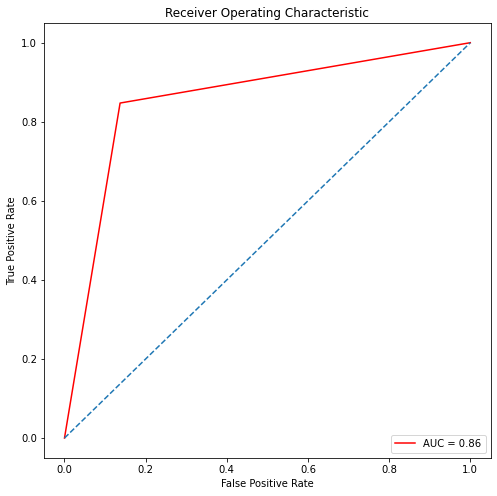

In [102]:
plot_roc(final_xgb_model,X_test,y_test)

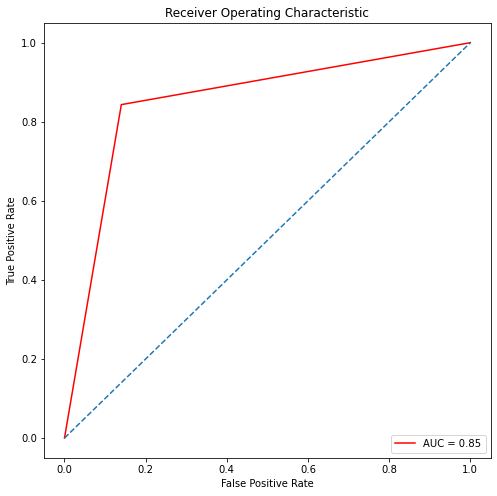

In [103]:
plot_roc(forest_final_model,X_test,y_test)

In [104]:
evaluate_model(final_xgb_model,X_test,y_test)

Accuracy = 0.8553422532480124
Recall = 0.8473161033797216
Precision= 0.8547934215804252
f1_score= 0.8510383386581468


In [105]:
evaluate_model(forest_final_model,X_test,y_test)

Accuracy = 0.8518518518518519
Recall = 0.8433399602385686
Precision= 0.8514652749899638
f1_score= 0.847383140231722


In [ ]:
#compute metrics using cv on the whole data
scores_xgb = cross_val_score(final_xgb_model, X, y, scoring='accuracy', cv=5, n_jobs=-1)
scores_forest = cross_val_score(forest_final_model, X, y, scoring='accuracy', cv=5, n_jobs=-1)

In [ ]:
plt.boxplot([scores1, scores2], labels=['XgBoost', 'RandomForest'], showmeans=True)
plt.show()

### Comparing XgBoost Classifer with Random Forest  using the McNemar Test

In [106]:
model_xgb_pred = final_xgb_model.predict(X_test) # compute prediction on the training set
#create a dataframe the contain y_true and y_predict
model_Xgb_table = pd.DataFrame(dict(y_true=y_test, y_pred=model_xgb_pred)) 
#crate model1_tf column that val true if the y_treu=y_predict
model_Xgb_table['model1_tf'] = model_Xgb_table.y_true == model_Xgb_table.y_pred

model1_tf = model_Xgb_table.model1_tf.value_counts() #count the numbre of true positive 
model1_tf

True     4411
False     746
Name: model1_tf, dtype: int64

In [107]:
model_forest_pred = forest_final_model.predict(X_test)
model_forest_table = pd.DataFrame(dict(y_true=y_test, y_pred=model_forest_pred))
model_forest_table['model2_tf'] = model_forest_table.y_true == model_forest_table.y_pred
model2_tf = model_forest_table.model2_tf.value_counts()
model2_tf

True     4393
False     764
Name: model2_tf, dtype: int64

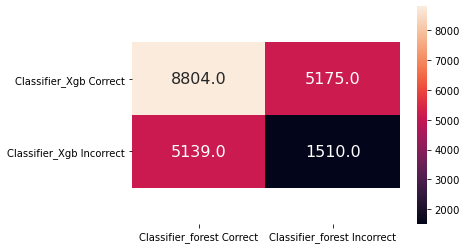

In [108]:
#contingecy table
table = [[model1_tf[1]+model2_tf[1], model1_tf[1]+model2_tf[0]],
         [model1_tf[0]+model2_tf[1], model1_tf[0]+model2_tf[0]]]

#convert the contingecy table to a dataframe
table = pd.DataFrame(table, index=['Classifier_Xgb Correct', 'Classifier_Xgb Incorrect'], 
                     columns=['Classifier_forest Correct', 'Classifier_forest Incorrect'])

#visualze the contingecy table
sb.heatmap(table, annot=True, fmt=".1f", annot_kws={"size": 16})
plt.yticks(rotation=0)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [109]:
#  calculating the mcnemar test
from statsmodels.stats.contingency_tables import mcnemar

result = mcnemar(table.values, exact=False, correction=True)

# summarize the finding
print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue)) #get the test statistic and the p_value

# interpret the p-value
alpha = 0.05
if result.pvalue > alpha:
    print('Classifiers have a similar proportion of errors on the test set.fail to reject H0')
else:
    print('reject H0')

statistic=0.119, p-value=0.730
Classifiers have a similar proportion of errors on the test set.fail to reject H0


## Imbalanced Dataset 

split the data into training and test set using stratification

In [110]:
from sklearn.model_selection import StratifiedShuffleSplit
y=data1['Y'] #label
x=data1[list(data1.columns)[1:]] #features
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train,test in splitter.split(x,y):     #this will splits the index
    X_train_SS = x.iloc[train]
    y_train_SS = y.iloc[train]
    X_test_SS = x.iloc[test]
    y_test_SS = y.iloc[test]
print(y_train_SS.value_counts())  
print(y_test_SS.value_counts())

0    131568
1      8947
Name: Y, dtype: int64
0    56387
1     3835
Name: Y, dtype: int64


In [111]:
print(len(x))
print(len(y))

200737
200737


## Train ML Models

**Logistic Regression**

In [112]:
lg_clf=LogisticRegression()
lg_clf.fit(X_train_SS,y_train_SS)

LogisticRegression()

**Desicion Tree**

In [113]:
tree_clf=DecisionTreeClassifier()
tree_clf.fit(X_train_SS,y_train_SS)

DecisionTreeClassifier()

**Random Forest**

In [114]:
forest_final_model=RandomForestClassifier(n_estimators = 200,
                                 min_samples_split = 5,
                                 max_features = 'auto',
                                 max_depth = 55,
                                 bootstrap = True,
                                 random_state = 42)
forest_final_model.fit(X_train_SS,y_train_SS)

RandomForestClassifier(max_depth=55, min_samples_split=5, n_estimators=200,
                       random_state=42)

**XgBoost**

In [115]:

final_xgb_model.fit(X_train_SS,y_train_SS)

[02:27:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='hist', validate_parameters=1, verbosity=None)

**AdaBoost**

In [116]:
final_adaboost_model=AdaBoostClassifier(DecisionTreeClassifier(),learning_rate= 0.01, n_estimators= 50)
final_adaboost_model.fit(X_train_SS,y_train_SS)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.01)

In [117]:
Models = {"Logistic Regression" : {"Model" : lg_clf},
          "Random Forest" : {"Model" : forest_final_model},
          "XGBoost" : {"Model" : final_xgb_model},
          "Decision Tree Model" : {"Model" : tree_clf},
          "AdaBoost" : {"Model" : final_adaboost_model}
          }
         

for model in Models:
    #make prediction for evaluation
    y_pred=Models[model]["Model"].predict(X_test_SS)
   
    #evalation :
    metrics_dict = {
        "Accuracy": metrics.accuracy_score(y_test_SS, y_pred),
        "Precision": metrics.precision_score(y_test_SS, y_pred),
        "Recall": metrics.recall_score(y_test_SS, y_pred),
        "F1-Score": metrics.f1_score(y_test_SS, y_pred)
    }
   
    Models[model]["Evaluation"] = metrics_dict

   


metrics_dict = {}
for model in Models :
    metrics_dict[model] = Models[model]["Evaluation"]

Metrics_mesures = pd.DataFrame(metrics_dict)
Metrics_mesures



,Logistic Regression,Random Forest,XGBoost,Decision Tree Model,AdaBoost
Accuracy,0.939092,0.951181,0.953256,0.937548,0.946265
Precision,0.670757,0.681394,0.711618,0.509872,0.595170
Recall,0.085528,0.438331,0.447197,0.498305,0.488396
F1-Score,0.151711,0.533481,0.549239,0.504022,0.536522


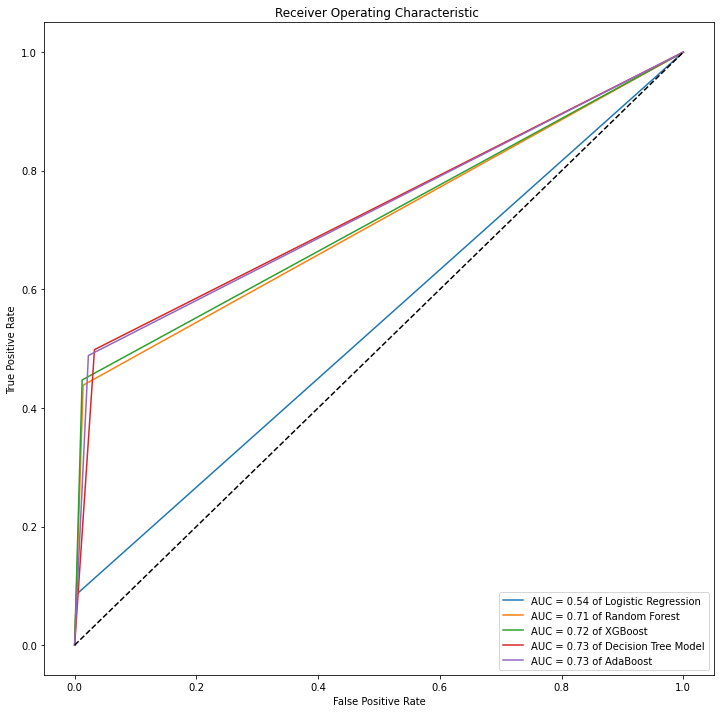

In [118]:
def plot_roc(models,X_test,y_test):
   
    index = 0
    plt.figure(figsize=(12,12))
   
    for model in models :
        y_pred = models[model]["Model"].predict(X_test)
        false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
        roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate,
                 true_positive_rate,
                 label = 'AUC = %0.2f of %s' % (roc_auc, model)
                )
        index+=1
       
    plt.plot([0, 1], [0, 1],linestyle='--', color = "#000000")
   
    plt.title('Receiver Operating Characteristic ')
    plt.legend(loc = 'lower right')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
   


plot_roc(Models, X_test_SS, y_test_SS)


split the data into training and test set using random split

In [119]:
y=data1['Y'] #label
x=data1[list(data1.columns)[1:]] #features
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42) 

In [120]:
lg_clf=LogisticRegression()
lg_clf.fit(X_train,y_train)

LogisticRegression()

In [121]:
tree_clf=DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [122]:
forest_final_model=RandomForestClassifier(n_estimators = 200,
                                 min_samples_split = 5,
                                 max_features = 'auto',
                                 max_depth = 55,
                                 bootstrap = True,
                                 random_state = 42)
forest_final_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=55, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [123]:

final_xgb_model.fit(X_train,y_train)

[02:32:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='hist', validate_parameters=1, verbosity=None)

In [124]:

final_adaboost_model.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.01)

In [125]:
for model in Models:
    #make prediction for evaluation
    y_pred=Models[model]["Model"].predict(X_test)
   
    #evalation :
    metrics_dict = {
        "Accuracy": metrics.accuracy_score(y_test, y_pred),
        "Precision": metrics.precision_score(y_test, y_pred),
        "Recall": metrics.recall_score(y_test, y_pred),
        "F1-Score": metrics.f1_score(y_test, y_pred)
    }
   
    Models[model]["Evaluation"] = metrics_dict

   


metrics_dict = {}
for model in Models :
    metrics_dict[model] = Models[model]["Evaluation"]

Metrics_mesures = pd.DataFrame(metrics_dict)
Metrics_mesures

,Logistic Regression,Random Forest,XGBoost,Decision Tree Model,AdaBoost
Accuracy,0.939723,0.971555,0.952194,0.978712,0.945668
Precision,0.682420,0.874911,0.694079,0.847416,0.584535
Recall,0.094428,0.643997,0.441538,0.810620,0.498300
F1-Score,0.165901,0.741901,0.539728,0.828610,0.537984


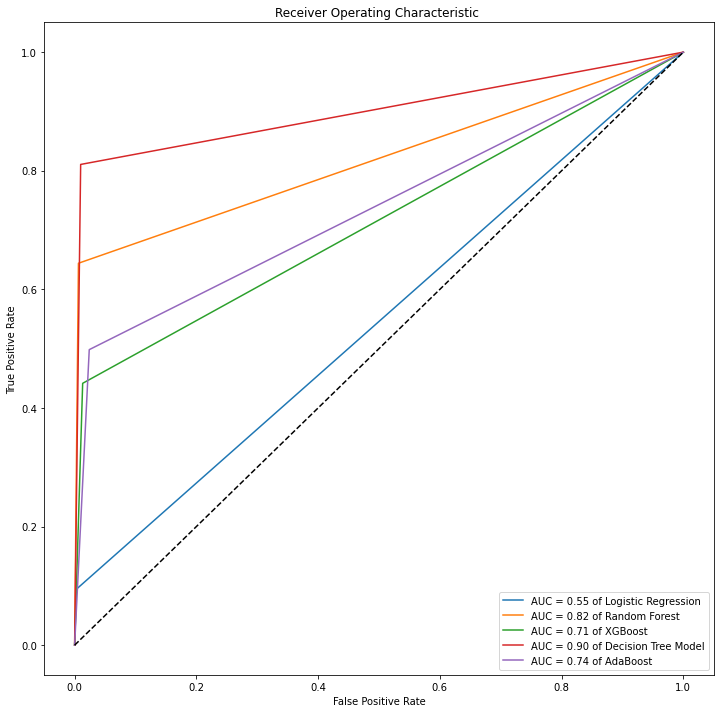

In [126]:
plot_roc(Models, X_test, y_test)